In [1]:
import os
from model.cslib import fetch_ts, engineer_features

In [2]:
data_dir = os.path.join("data","cs-train")

In [3]:
ts_all = fetch_ts(data_dir,clean=False)

... loading ts data from files


In [4]:
for key,item in ts_all.items():
    print(key, item['revenue'].sum())

all 3721940.9250000003
eire 104589.4
france 38985.42
germany 45651.261
hong_kong 14393.130000000001
netherlands 12296.78
norway 38326.12
portugal 13327.210000000003
singapore 12945.460000000001
spain 15393.36
united_kingdom 3343551.6440000003


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

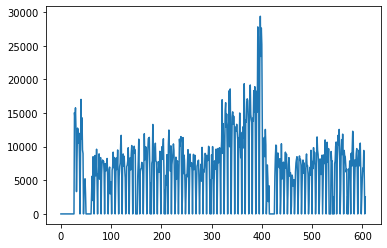

In [6]:
ts = ts_all['all']
total_views = ts['total_views']

plt.plot(np.arange(len(total_views)),total_views)
plt.show()

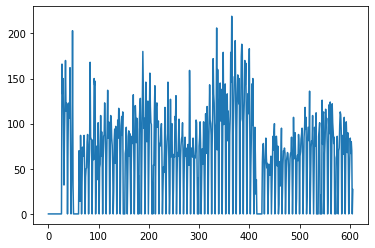

In [7]:
unique_invoices = ts['unique_invoices']

plt.plot(np.arange(len(unique_invoices)),unique_invoices)
plt.show()

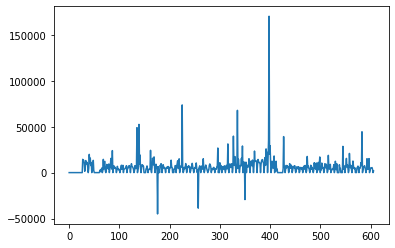

In [8]:
revenue = ts['revenue']

plt.plot(np.arange(len(revenue)),revenue)
plt.show()

In [9]:
# without negative revenue
mask = revenue < 0
ts.at[mask, 'revenue'] = np.nan

# without quantile range outliers
mask = revenue.between(revenue.quantile(.0), revenue.quantile(0.85)) 
ts.at[~mask, 'revenue'] = np.nan

mask = revenue.notna()
median = np.median(ts[mask]['revenue'])
print(median)

ts['revenue'].fillna(median, inplace = True)

4187.84


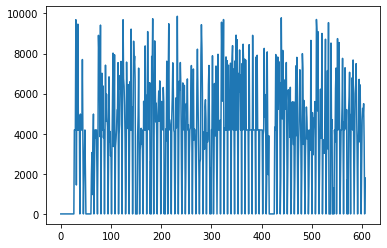

In [10]:
revenue = ts['revenue']

plt.plot(np.arange(len(revenue)),revenue)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


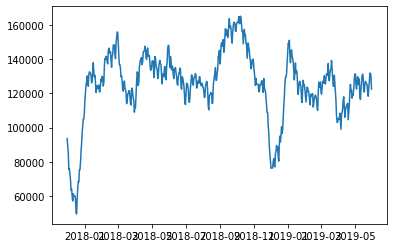

In [11]:
X, y, dates = engineer_features(ts)

plt.plot(dates,y)
plt.show()